# Flight Price Data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("train.csv")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3898
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13883
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108
10679,Air India,27-04-2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649


# Feature Engineering and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9088.064121,4611.359167,1760.0,5278.0,8373.0,12374.0,79513.0


In [6]:
df.shape

(10683, 11)

In [7]:
#checking null values 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional Info    0
Price              0
dtype: int64

In [8]:
#dropping the null values there are only two values in the df
df.dropna(inplace =True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional Info    0
Price              0
dtype: int64

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3898
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13883
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3898
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13883
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


# Airline Vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

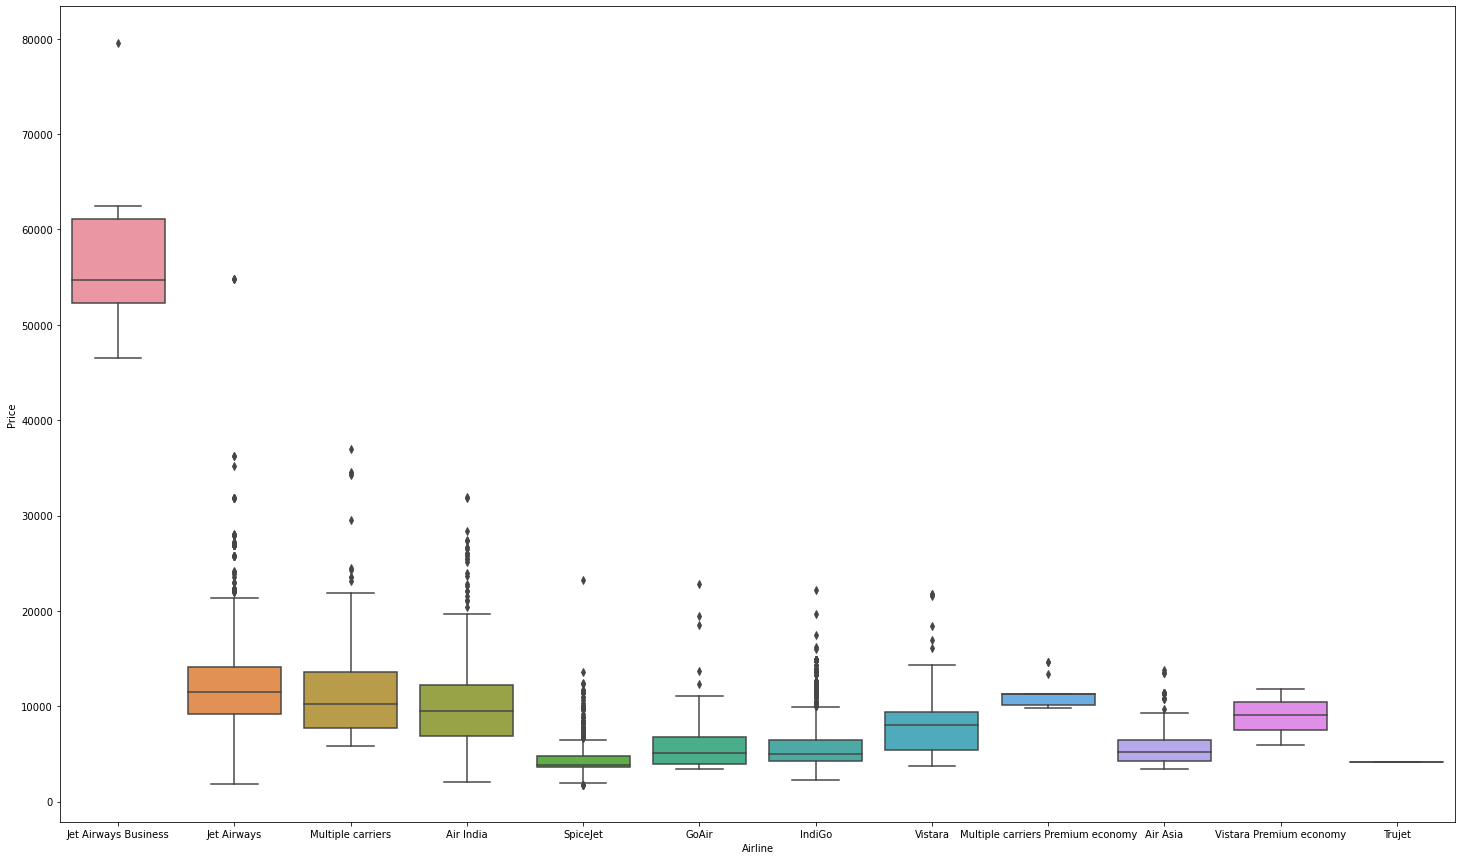

In [12]:
plt.figure(figsize=(25,15))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3898
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13883
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [14]:
df.sort_values('Airline',ascending=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
5833,Air Asia,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,07:35,19:25,11h 50m,1 stop,No info,6811
5007,Air Asia,15-05-2019,Delhi,Cochin,DEL → BLR → COK,16:45,22:25,5h 40m,1 stop,No info,6753
5006,Air Asia,21-04-2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,4484
9883,Air Asia,09-05-2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3384
1052,Air Asia,18-05-2019,Delhi,Cochin,DEL → BLR → COK,16:45,19-05-2022 07:10,14h 25m,1 stop,No info,7354
...,...,...,...,...,...,...,...,...,...,...,...
7505,Vistara,21-06-2019,Delhi,Cochin,DEL → COK,06:00,09:10,3h 10m,non-stop,No info,6217
2873,Vistara,09-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:20,10-06-2022 23:25,27h 5m,1 stop,No info,8086
7657,Vistara Premium economy,01-03-2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,9126
426,Vistara Premium economy,03-03-2019,Banglore,New Delhi,BLR → DEL,16:00,18:35,2h 35m,non-stop,No info,11794


# Source Vs Price Analysis

Text(0, 0.5, 'Price')

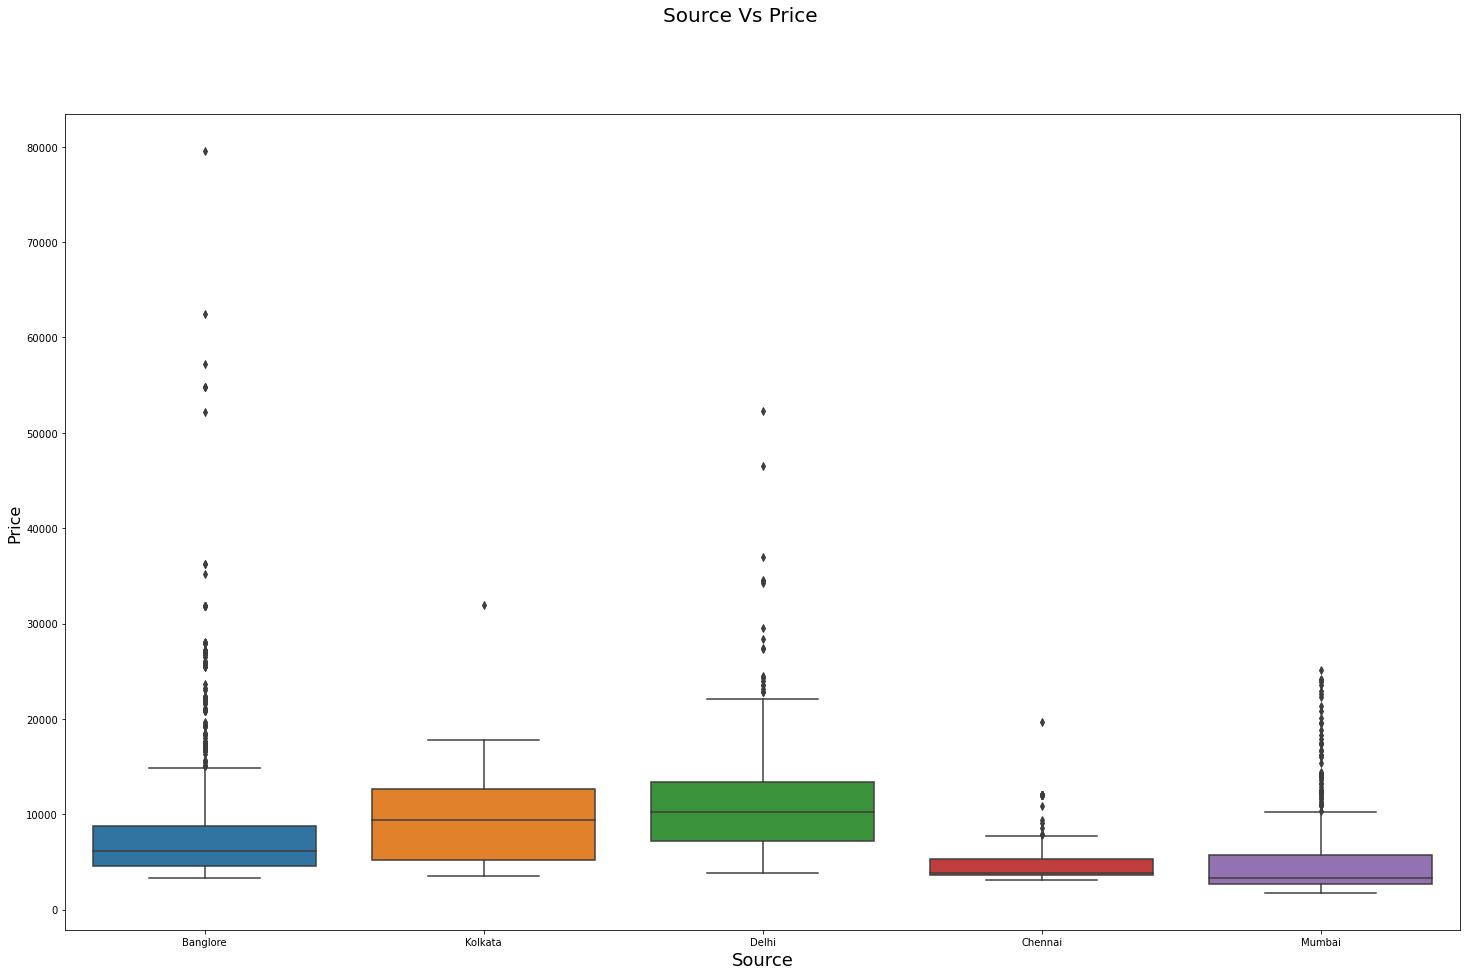

In [15]:
plt.figure(figsize=(25,15))
sns.boxplot(x='Source',y='Price',data=df)
plt.suptitle('Source Vs Price', fontsize=20)
plt.xlabel('Source', fontsize=18)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

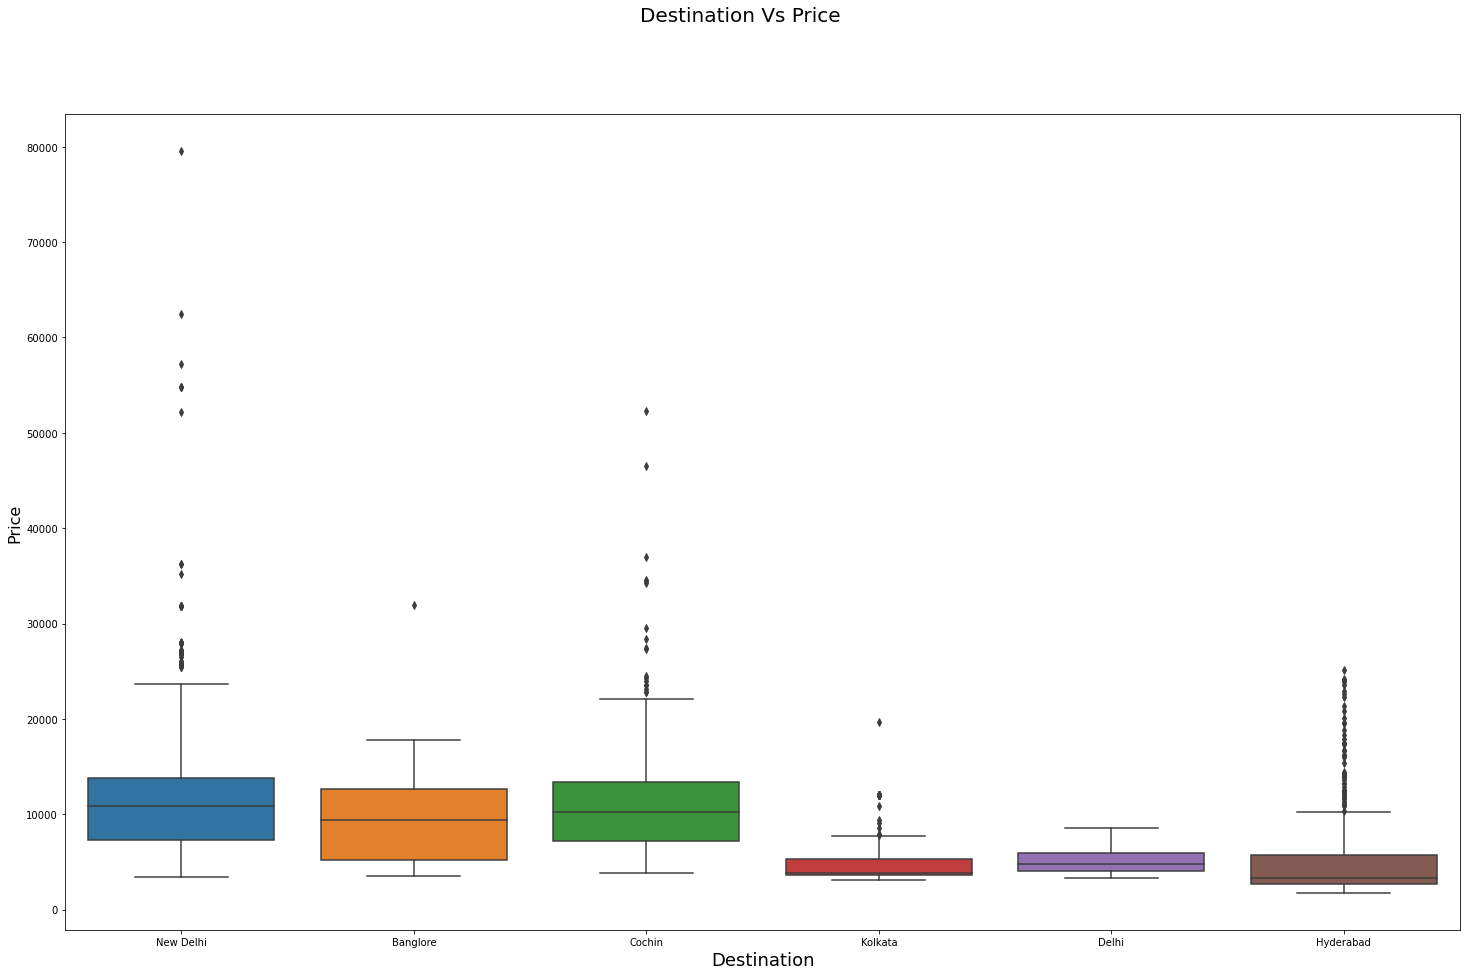

In [16]:
plt.figure(figsize=(25,15))
sns.boxplot(x='Destination',y='Price',data=df)
plt.suptitle('Destination Vs Price', fontsize=20)
plt.xlabel('Destination', fontsize=18)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

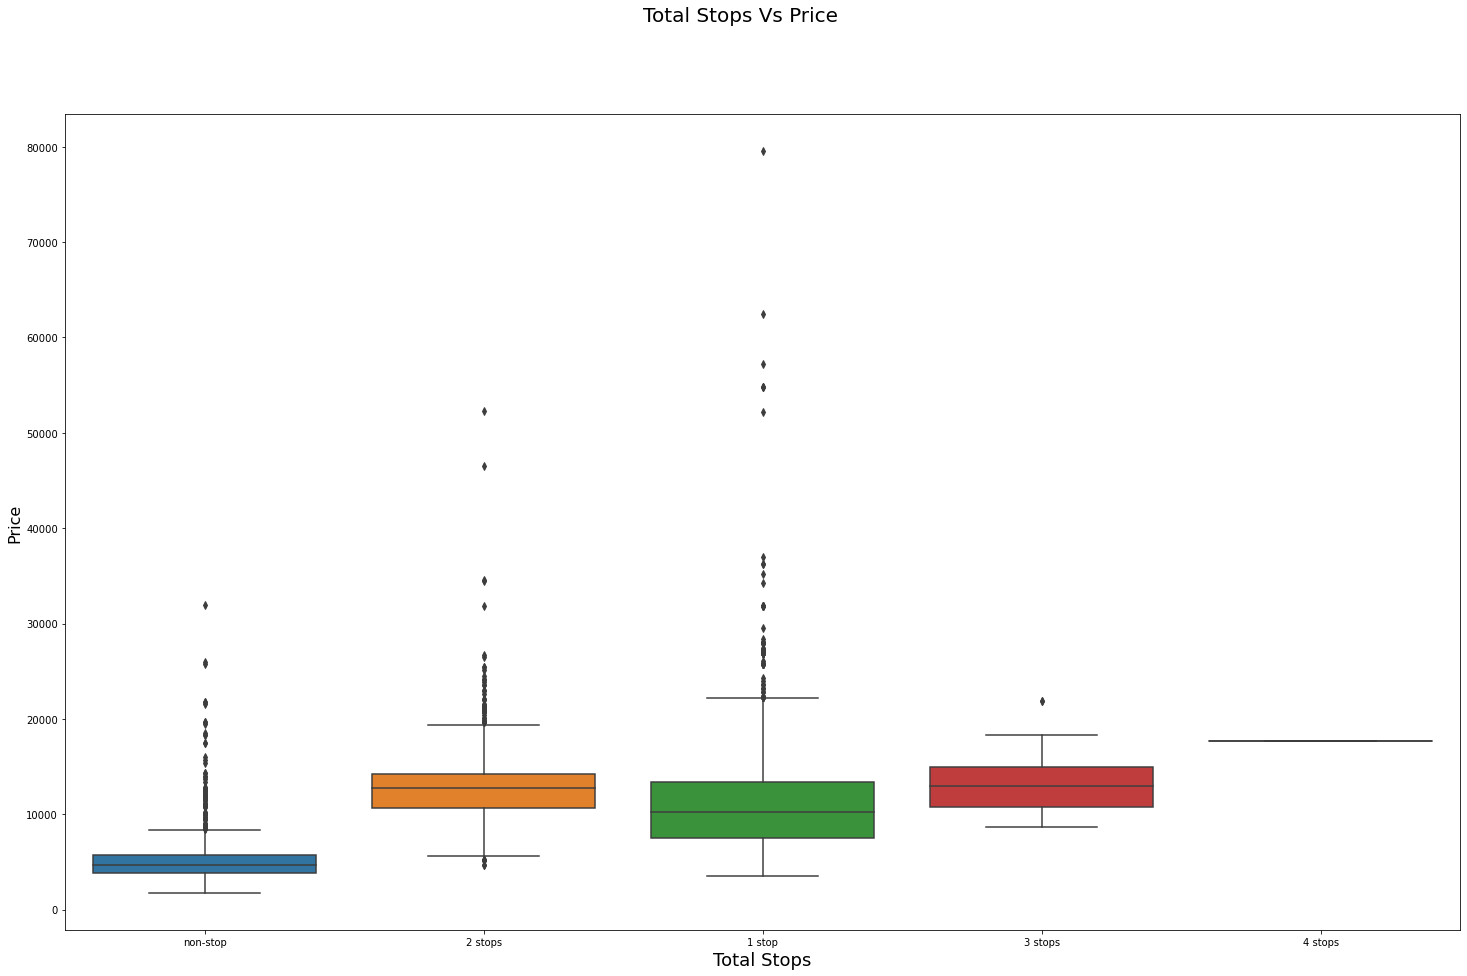

In [17]:
plt.figure(figsize=(25,15))
sns.boxplot(x='Total_Stops',y='Price',data=df)
plt.suptitle('Total Stops Vs Price', fontsize=20)
plt.xlabel('Total Stops', fontsize=18)
plt.ylabel('Price', fontsize=16)

In [18]:
#splitting the Route Columns into 5 columns
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3898,BLR,DEL,NaN,NaN,NaN
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13883,DEL,LKO,BOM,COK,NaN
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,CCU,NAG,BLR,NaN,NaN
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,BLR,NAG,DEL,NaN,NaN


In [20]:
df.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Additional Info        0
Price                  0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [21]:
#Route1 and Route 2 are necessary to replaced with none 
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('None',inplace=True)

In [22]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional Info    0
Price              0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [23]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [24]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [25]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3898,BLR,DEL,None,None,None,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-16 05:50:00,2022-03-16 13:15:00,7h 25m,2 stops,No info,7663,CCU,IXR,BBI,BLR,None,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-16 09:25:00,2022-10-06 04:25:00,19h,2 stops,No info,13883,DEL,LKO,BOM,COK,None,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-16 18:05:00,2022-03-16 23:30:00,5h 25m,1 stop,No info,6219,CCU,NAG,BLR,None,None,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-16 16:50:00,2022-03-16 21:35:00,4h 45m,1 stop,No info,13303,BLR,NAG,DEL,None,None,3,1


In [27]:
df.drop(columns=["Date_of_Journey"],inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3898,BLR,DEL,None,None,None,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-16 05:50:00,2022-03-16 13:15:00,7h 25m,2 stops,No info,7663,CCU,IXR,BBI,BLR,None,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-16 09:25:00,2022-10-06 04:25:00,19h,2 stops,No info,13883,DEL,LKO,BOM,COK,None,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-03-16 18:05:00,2022-03-16 23:30:00,5h 25m,1 stop,No info,6219,CCU,NAG,BLR,None,None,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-03-16 16:50:00,2022-03-16 21:35:00,4h 45m,1 stop,No info,13303,BLR,NAG,DEL,None,None,3,1


In [29]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [30]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [31]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [32]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3898,BLR,DEL,None,None,None,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7663,CCU,IXR,BBI,BLR,None,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13883,DEL,LKO,BOM,COK,None,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6219,CCU,NAG,BLR,None,None,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13303,BLR,NAG,DEL,None,None,3,1,16,50,21,35


In [33]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [34]:
df['Duration']=duration

In [35]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [36]:
df['dur_hour']=df['Duration'].apply(hour)

In [37]:
df['dur_min']=df['Duration'].apply(minutes)

In [38]:
drop_col(df,'Duration')

In [39]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [40]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3898,BLR,DEL,None,None,None,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7663,CCU,IXR,BBI,BLR,None,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13883,DEL,LKO,BOM,COK,None,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6219,CCU,NAG,BLR,None,None,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13303,BLR,NAG,DEL,None,None,3,1,16,50,21,35,4,45


Text(0, 0.5, 'Price')

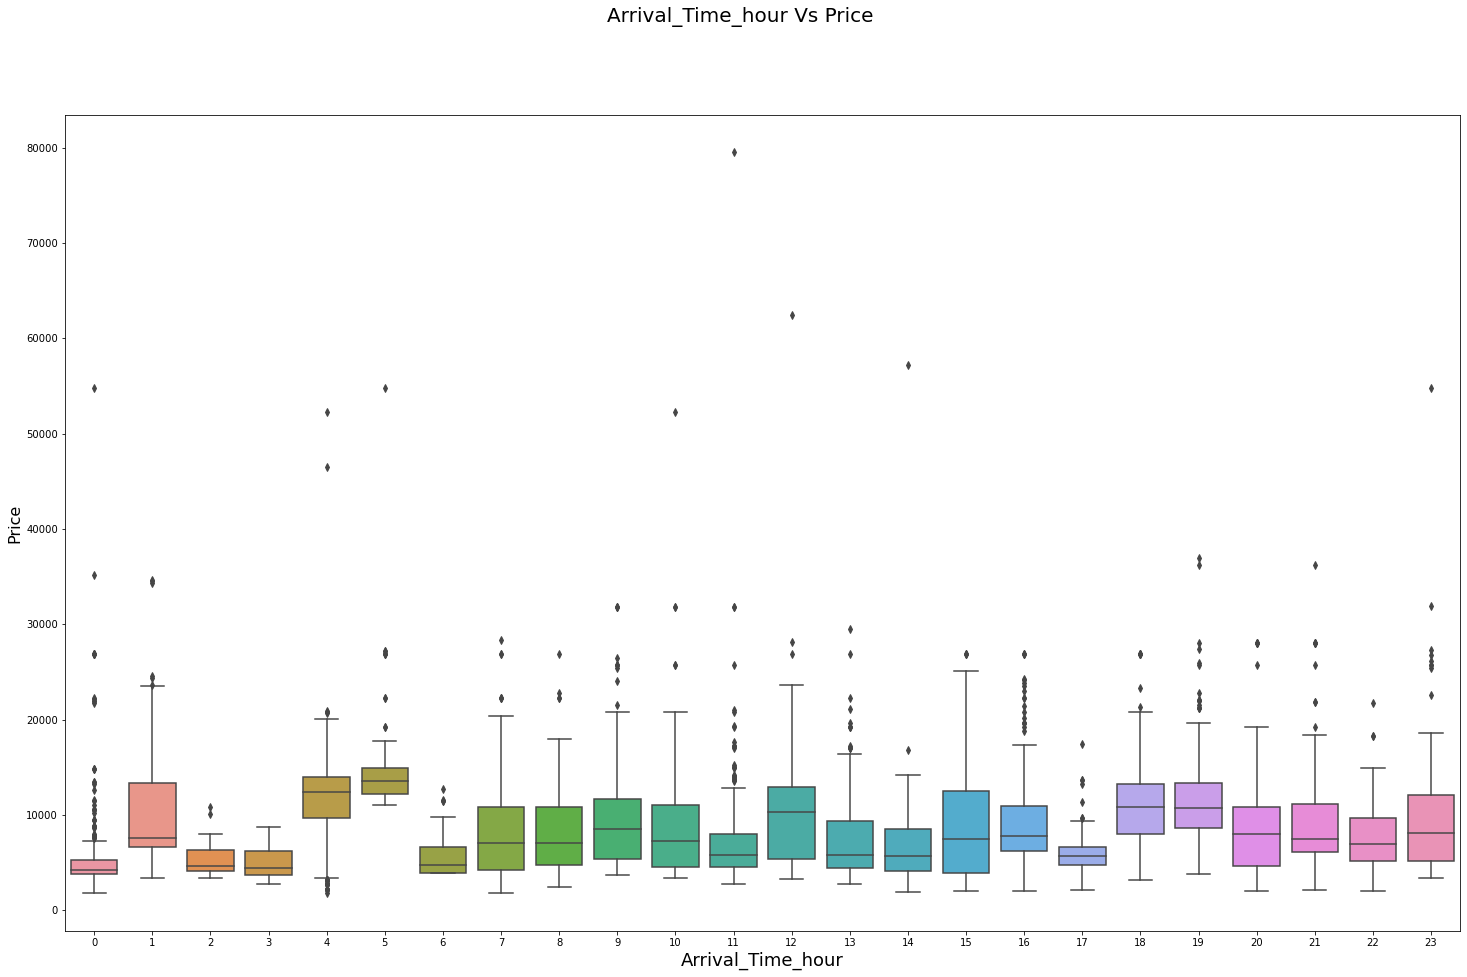

In [41]:
plt.figure(figsize=(25,15))
sns.boxplot(x='Arrival_Time_hour',y='Price',data=df)
plt.suptitle('Arrival_Time_hour Vs Price', fontsize=20)
plt.xlabel('Arrival_Time_hour', fontsize=18)
plt.ylabel('Price', fontsize=16)

<AxesSubplot:xlabel='Price'>

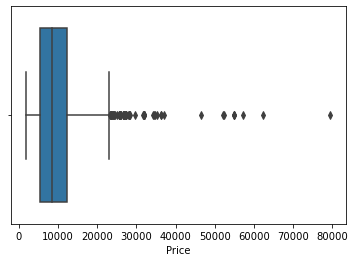

In [42]:
#Boxplot 
sns.boxplot(x=df['Price'])

In [43]:
#Handling Oultier
df.drop(df[(df['Price']>40000)].index,inplace=True)

<AxesSubplot:xlabel='Price'>

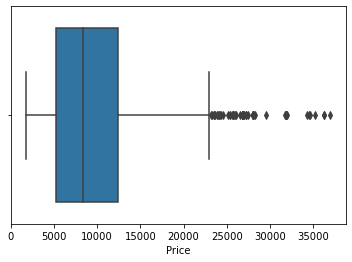

In [44]:
sns.boxplot(x=df['Price'])

In [45]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3898,BLR,DEL,None,None,None,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7663,CCU,IXR,BBI,BLR,None,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13883,DEL,LKO,BOM,COK,None,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6219,CCU,NAG,BLR,None,None,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13303,BLR,NAG,DEL,None,None,3,1,16,50,21,35,4,45


In [46]:
df.drop(columns=['Route'],inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    df[i]=le.fit_transform(df[i])

In [48]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3898,0,13,29,13,5,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7663,2,25,1,3,5,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13883,3,32,4,5,5,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6219,2,34,3,13,5,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13303,0,34,8,13,5,3,1,16,50,21,35,4,45


In [49]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
dict2 = {'non-stop':1, '2 stops':3, '1 stop':2, '3 stops':4, '4 stops':5}
df['Total_Stops'] = df['Total_Stops'].replace(dict2)

In [51]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,1,No info,3898,0,13,29,13,5,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,3,No info,7663,2,25,1,3,5,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,3,No info,13883,3,32,4,5,5,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2,No info,6219,2,34,3,13,5,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,2,No info,13303,0,34,8,13,5,3,1,16,50,21,35,4,45


In [52]:
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] =  le.fit_transform(df['Destination'])
df['Airline'] = le.fit_transform(df['Airline']) 

In [53]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional Info,Price,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,3,0,5,1,No info,3898,0,13,29,13,5,24,3,22,20,1,10,2,50
1,1,3,0,3,No info,7663,2,25,1,3,5,5,1,5,50,13,15,7,25
2,4,2,1,3,No info,13883,3,32,4,5,5,6,9,9,25,4,25,19,0
3,3,3,0,2,No info,6219,2,34,3,13,5,5,12,18,5,23,30,5,25
4,3,0,5,2,No info,13303,0,34,8,13,5,3,1,16,50,21,35,4,45


In [54]:
df.drop(columns=['Additional Info'],inplace = True)

<AxesSubplot:>

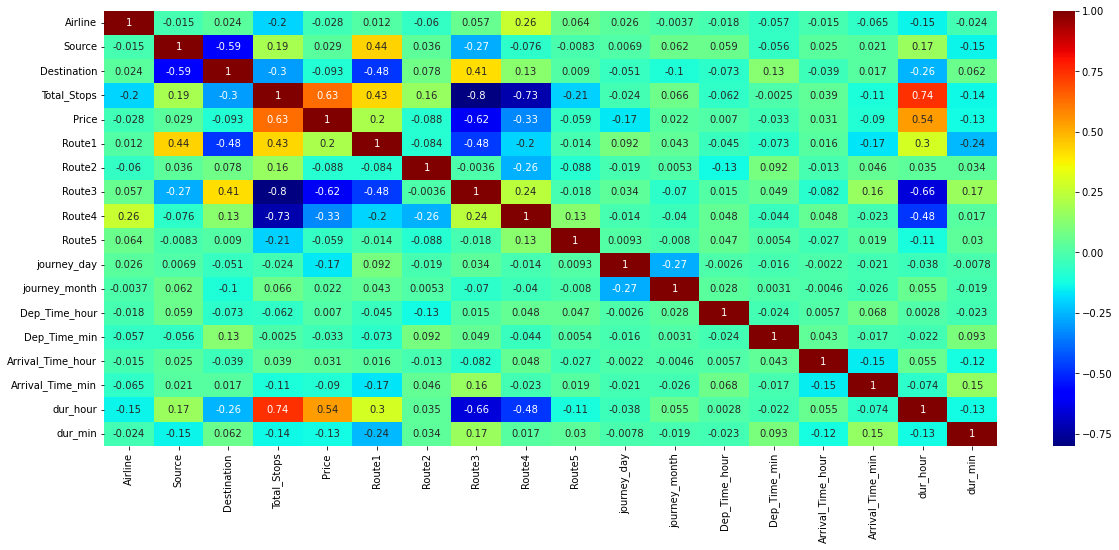

In [55]:
#Correlation between Features and Target 
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,8
sns.heatmap(df.corr(),annot=True,cmap="jet")

In [56]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'dur_hour', 'dur_min'],
      dtype='object')

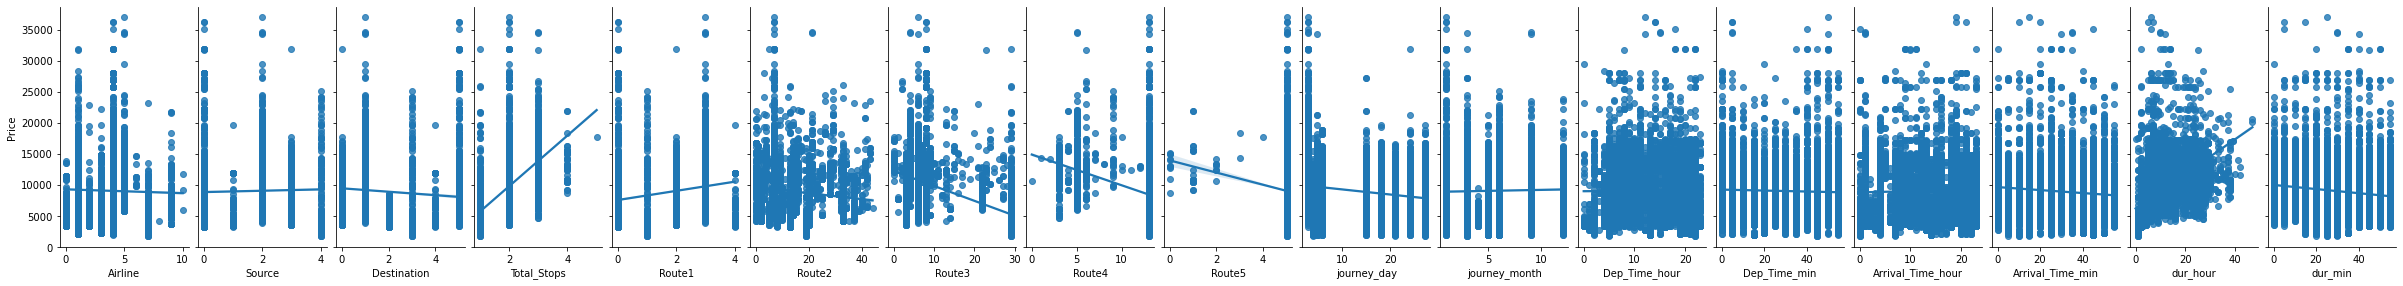

In [57]:
#relation between features and Price
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10
sns.pairplot(df,x_vars=['Airline', 'Source', 'Destination', 'Total_Stops','Route1','Route2', 'Route3', 'Route4', 'Route5', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'dur_hour', 'dur_min'],y_vars='Price',height = 4,aspect = 0.5,kind='reg')

In [58]:
X= df.drop(columns=['Price'])
X

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,3,0,5,1,0,13,29,13,5,24,3,22,20,1,10,2,50
1,1,3,0,3,2,25,1,3,5,5,1,5,50,13,15,7,25
2,4,2,1,3,3,32,4,5,5,6,9,9,25,4,25,19,0
3,3,3,0,2,2,34,3,13,5,5,12,18,5,23,30,5,25
4,3,0,5,2,0,34,8,13,5,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,1,2,5,29,13,5,4,9,19,55,22,25,2,30
10679,1,3,0,1,2,5,29,13,5,27,4,20,45,23,20,2,35
10680,4,0,2,1,0,13,29,13,5,27,4,8,20,11,20,3,0
10681,9,0,5,1,0,13,29,13,5,3,1,11,30,14,10,2,40


In [59]:
Y =df['Price']
Y

0         3898
1         7663
2        13883
3         6219
4        13303
         ...  
10678     4108
10679     4146
10680     7230
10681    12649
10682    11754
Name: Price, Length: 10673, dtype: int64

In [60]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [61]:
#Standard Scaling of Features 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Model 

 # Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [63]:
Lr = LinearRegression()
Lr.fit(X_train,Y_train)
Y_pred = Lr.predict(X_test)

In [64]:
print("r2score",r2_score(Y_test,Y_pred))
print("mean_squared_error",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))

r2score 0.5309716473843912
mean_squared_error 9404686.23277851
mean_absolute_error 2258.5886330801204


# KNN Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse = []
r2 = []
for i in range(1,10):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(X_train,Y_train)
    Y_pred = KNR.predict(X_test)
    mse_i = mean_squared_error(Y_test,Y_pred)
    mse.append(mse_i)
    r2_i = r2_score(Y_test,Y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

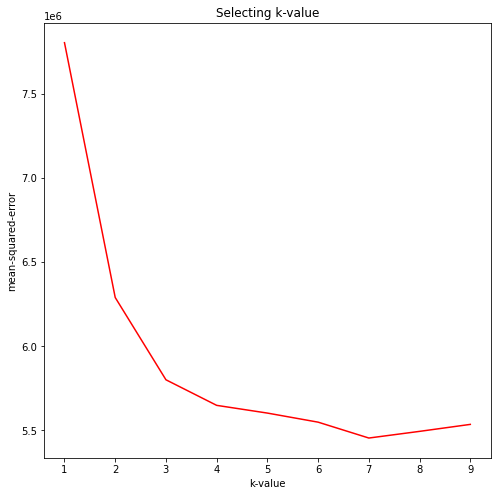

In [66]:
#plotting K values 
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

In [67]:
KNR = KNeighborsRegressor(n_neighbors=7)
KNR.fit(X_train,Y_train)
Y_pred = KNR.predict(X_test)

In [68]:
print("r2score",r2_score(Y_test,Y_pred))
print("mean_squared_error",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))

r2score 0.7279958882470587
mean_squared_error 5454069.697058441
mean_absolute_error 1606.2690681368088


# Lasso Regularization

In [69]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [70]:
LaR = Lasso(alpha = 0.1,normalize=True)

In [71]:
LaR.fit(X_train,Y_train)
Y_pred = LaR.predict(X_test)

In [72]:
print("r2score",r2_score(Y_test,Y_pred))
print("mean_squared_error",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))

r2score 0.5311280919607912
mean_squared_error 9401549.296289152
mean_absolute_error 2254.5101285194282


# Ridge Regularization

In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [74]:
Ri = Ridge(normalize=True)
Ri.fit(X_train,Y_train)
Y_pred = Ri.predict(X_test)
print("r2_score",r2_score(Y_test,Y_pred))
print("mse",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))

r2_score 0.44674126655341373
mse 11093625.288520407
mean_absolute_error 2473.7567236648447


# Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train,Y_train)
Y_pred =DTR.predict(X_test)
print("r2_score",r2_score(Y_test,Y_pred))
print("mse",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))


r2_score 0.7547876830667015
mse 4916856.06703676
mean_absolute_error 1310.0835893593107


In [76]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3,4,5],
    'max_features' : [2,3,4,5,6,7]
}
estimator = DecisionTreeRegressor(random_state = 0)

best_model = GridSearchCV(estimator,param_grid,cv=5)
best_model.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [77]:
best_model.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features=7, min_samples_leaf=5,
                      random_state=0)

In [78]:
best_model.best_params_

{'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 5}

In [79]:
DTR=DecisionTreeRegressor(max_depth= 7, max_features= 7, min_samples_leaf= 5)
DTR.fit(X_train,Y_train)
Y_pred = DTR.predict(X_test)
print("r2_score",r2_score(Y_test,Y_pred))
print("mse",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))

r2_score 0.7176428095833708
mse 5661663.664101745
mean_absolute_error 1612.8891578390267


# Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
RFR = RandomForestRegressor(random_state=0)
RFR.fit(X_train,Y_train)
Y_pred = RFR.predict(X_test)

In [81]:
print("r2_score",r2_score(Y_test,Y_pred))
print("mse",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))

r2_score 0.8350157887646142
mse 3308168.325813098
mean_absolute_error 1148.5780780908967
